## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, StratifiedKFold


#metricas
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


#models
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)


In [2]:
def cls_feature(X,max_cat = 10):
        #Agrupando features numéricas
    numeric_features  = [cls for cls in X.columns if X[cls].dtype == 'float64' or X[cls].dtype =='int64']
    # print('>>numeric_features:', numeric_features ,
          # len(numeric_features))


    #Agrupando features categoricas
    categorical_features = [cls for cls in X.columns if X[cls].dtypes == 'object' and X[cls].nunique()<=max_cat]
    # print('\n>>cat_features:', cat_features ,
          # len(cat_features))
    return numeric_features , categorical_features

In [3]:
df_train = pd.read_csv('/media/rey/Massa 2/academico/flask/data/train.csv')

## Data

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df_train.columns.shape

(21,)

In [9]:
df = df_train.copy()

## Prepro

In [10]:
random_state = 42

X = df.drop(columns=['price_range'])
#X = np.array(X_)

y = df['price_range']
#y  = np.array(y_)

In [11]:
numeric_features , categorical_features = cls_feature(X)


In [12]:
numeric_features


['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [13]:
categorical_features


[]

In [14]:

numerical_transformer = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer([
        ("num", numerical_transformer, numeric_features)
]
)


In [15]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['battery_power', 'blue', 'clock_speed',
                                  'dual_sim', 'fc', 'four_g', 'int_memory',
                                  'm_dep', 'mobile_wt', 'n_cores', 'pc',
                                  'px_height', 'px_width', 'ram', 'sc_h',
                                  'sc_w', 'talk_time', 'three_g',
                                  'touch_screen', 'wifi'])])

In [16]:
X_processed = preprocessor.fit_transform(X)

In [17]:
X_processed

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [18]:
print(f'X_prepro:{X_processed.shape}\ny:{y.shape}')

X_prepro:(2000, 20)
y:(2000,)


In [31]:
## Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


## Models

### SVC /SVM

In [34]:
clf=SVC()
parametres={'kernel': ['linear','poly','rbf'], 'gamma': [0.1, 1.0, 10.0]}
random_search_cv_clf=RandomizedSearchCV(clf,parametres,cv=5)
random_search_cv_clf.fit(X_train,y_train)
svc_clf=random_search_cv_clf.best_estimator_
y_pred2=svc_clf.predict(X_test)
print(classification_report(y_test,y_pred2, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.91      1.00      0.95        91
           2       0.99      0.95      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [35]:
svc_params = random_search_cv_clf.best_params_;svc_params

{'kernel': 'linear', 'gamma': 0.1}

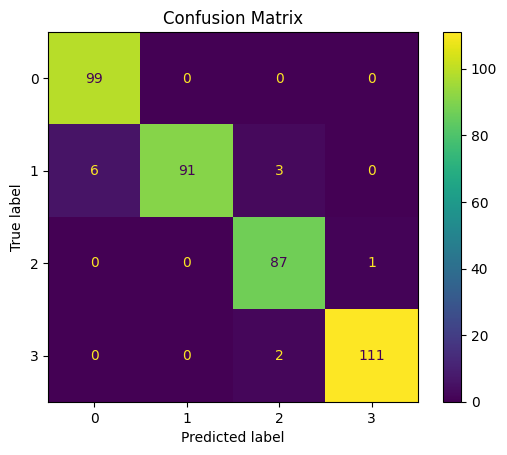

In [36]:
cm = confusion_matrix(svc_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1","2","3"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

### RandomForestCF

### 

In [89]:
clf = RandomForestClassifier()
parameters = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
random_search_cv_clf = RandomizedSearchCV(clf, parameters, cv=5)
random_search_cv_clf.fit(X_train, y_train)
rf_clf = random_search_cv_clf.best_estimator_
y_pred2 = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred2, zero_division=1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.87      0.82      0.85        91
           2       0.79      0.87      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



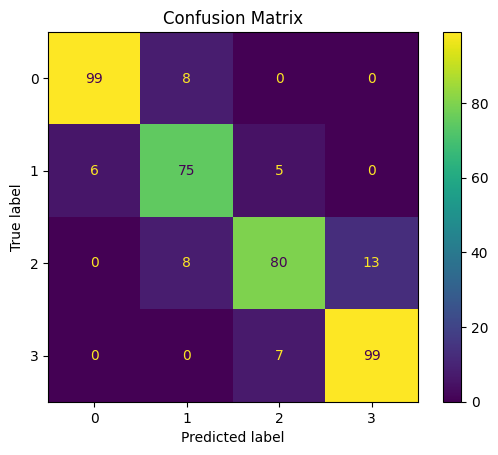

In [90]:
cm = confusion_matrix(rf_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["0","1","2","3"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

## Final

In [36]:
# Classificador SVM
clf = SVC(**svc_params,random_state=random_state)

# Transform
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[('num', numerical_transformer, numeric_features)],
        #remainder='passthrough'
    )),
    ('svc', clf)
])

# Treinar o pipeline com os dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões nos novos dados de teste
y_pred = pipeline.predict(X_test)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.90      1.00      0.95        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [37]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['battery_power', 'blue',
                                                   'clock_speed', 'dual_sim',
                                                   'fc', 'four_g', 'int_memory',
                                                   'm_dep', 'mobile_wt',
                                                   'n_cores', 'pc', 'px_height',
                                                   'px_width', 'ram', 'sc_h',
                                                   'sc_w', 'talk_time',
                                                   'three_g', 'touch_screen',
                                                   'wifi'])])),
                ('svc', SVC(gamma=0.1, kernel='linear', random_state=42))])

In [32]:
#             precision    recall  f1-score   support

#            0       1.00      0.93      0.97       105
#            1       0.90      1.00      0.95        91
#            2       1.00      0.95      0.97        92
#            3       0.98      1.00      0.99       112

#     accuracy                           0.97       400
#    macro avg       0.97      0.97      0.97       400
# weighted avg       0.97      0.97      0.97       400


In [38]:
import pickle
pickle.dump(pipeline, open('/media/rey/Massa 2/academico/flask/data/modelo.pkl', 'wb'))
